# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

**Load data**

In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your zip file

# Unzip the uploaded file
!unzip gams-dataset-master.zip -d /content  # Make sure to use the actual filename
# List the contents of the unzipped folder
!ls /content/gams-dataset-master

Saving gams-dataset-master.zip to gams-dataset-master.zip
Archive:  gams-dataset-master.zip
40e9afd9eccd91c01cb9189e9c4cae02efa3d7c0
   creating: /content/gams-dataset-master/
  inflating: /content/gams-dataset-master/LICENSE  
  inflating: /content/gams-dataset-master/README.md  
  inflating: /content/gams-dataset-master/gams_indoor.csv  
  inflating: /content/gams-dataset-master/gams_sh_jingan_outdoor.csv  
gams_indoor.csv  gams_sh_jingan_outdoor.csv  LICENSE  README.md


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
filename = "/content/gams-dataset-master/gams_indoor.csv"  # Ensure this path points to your unzipped CSV file

data = pd.read_csv(
    filename,
    parse_dates=["ts"],
    index_col=["ts"],
)

# Scale the data
cols_to_scale = data.columns[:-1]
scaler = MinMaxScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

# Resample and sort data
data = data.resample('H').mean()
data.sort_index(inplace=True)
data.head()

<ipython-input-3-e0bb6ac23362>:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()


,co2,humidity,pm10,pm25,temperature,voc
ts,,,,,,
2016-11-21 00:00:00,0.143928,0.925410,0.056407,0.087367,0.392345,0.062000
2016-11-21 01:00:00,0.173406,0.796010,0.037141,0.054913,0.616867,0.062889
2016-11-21 02:00:00,0.356757,0.758707,0.100577,0.145691,0.796800,0.063200
2016-11-21 03:00:00,0.455800,0.753650,0.142179,0.214482,0.863704,0.066222
2016-11-21 04:00:00,0.462883,0.736541,0.082496,0.127187,0.890333,0.062773


In [4]:
# Cast datetime variable in datetime format.
data.index = pd.to_datetime(data.index)

data.index

DatetimeIndex(['2016-11-21 00:00:00', '2016-11-21 01:00:00',
               '2016-11-21 02:00:00', '2016-11-21 03:00:00',
               '2016-11-21 04:00:00', '2016-11-21 05:00:00',
               '2016-11-21 06:00:00', '2016-11-21 07:00:00',
               '2016-11-21 08:00:00', '2016-11-21 09:00:00',
               ...
               '2017-03-28 00:00:00', '2017-03-28 01:00:00',
               '2017-03-28 02:00:00', '2017-03-28 03:00:00',
               '2017-03-28 04:00:00', '2017-03-28 05:00:00',
               '2017-03-28 06:00:00', '2017-03-28 07:00:00',
               '2017-03-28 08:00:00', '2017-03-28 09:00:00'],
              dtype='datetime64[ns]', name='ts', length=3058, freq='h')

In [5]:
# cheking data duration
data.index.min(), data.index.max()

(Timestamp('2016-11-21 00:00:00'), Timestamp('2017-03-28 09:00:00'))

In [6]:
# Record missing value indices for each column
missing_values = {}
for col in data.columns:
    missing_indices = data[col][data[col].isnull()].index.tolist()
    missing_values[col] = missing_indices

# Group missing values by row number
missing_rows = {}
for col, indices in missing_values.items():
    for idx in indices:
        if idx not in missing_rows:
            missing_rows[idx] = {col}
        else:
            missing_rows[idx].add(col)

# Create final dataframe with missing values and their row indices
missing_df = pd.DataFrame(columns=['row_index', 'missing_columns'])
for idx, cols in missing_rows.items():
    missing_df.loc[len(missing_df)] = [idx, list(cols)]
missing_df.set_index('row_index', inplace=True)

missing_df.head()

,missing_columns
row_index,
2016-12-01 05:00:00,"[pm10, temperature, pm25, voc, co2, humidity]"
2016-12-06 08:00:00,"[pm10, temperature, pm25, voc, co2, humidity]"
2016-12-06 09:00:00,"[pm10, temperature, pm25, voc, co2, humidity]"
2016-12-06 10:00:00,"[pm10, temperature, pm25, voc, co2, humidity]"
2016-12-06 11:00:00,"[pm10, temperature, pm25, voc, co2, humidity]"


<ipython-input-7-8a01002ec633>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_ = data.asfreq("1H")
<ipython-input-7-8a01002ec633>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed = data_.fillna(method="ffill")


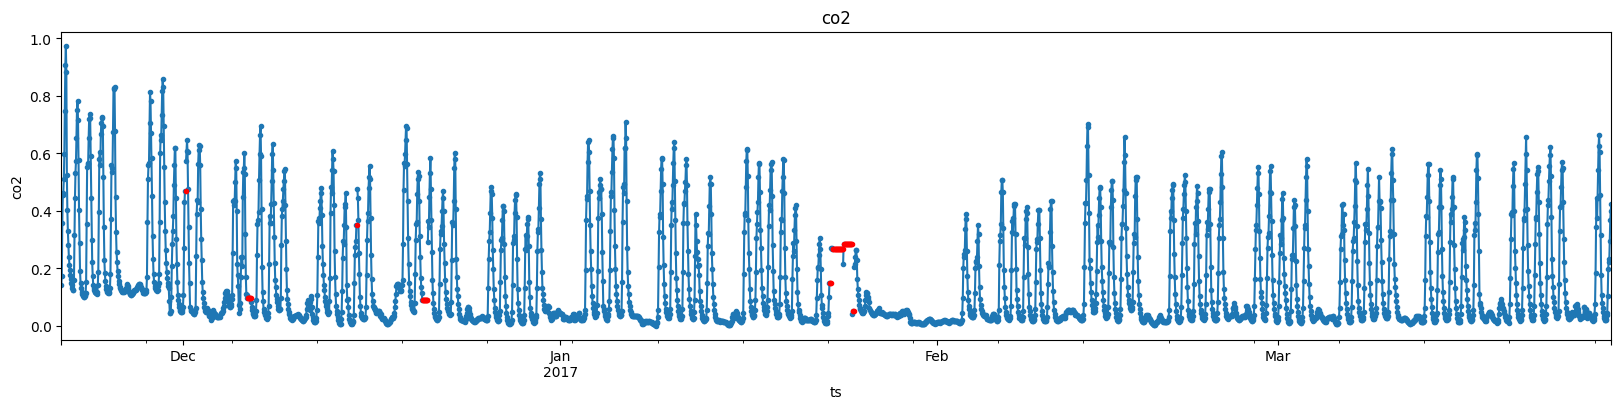

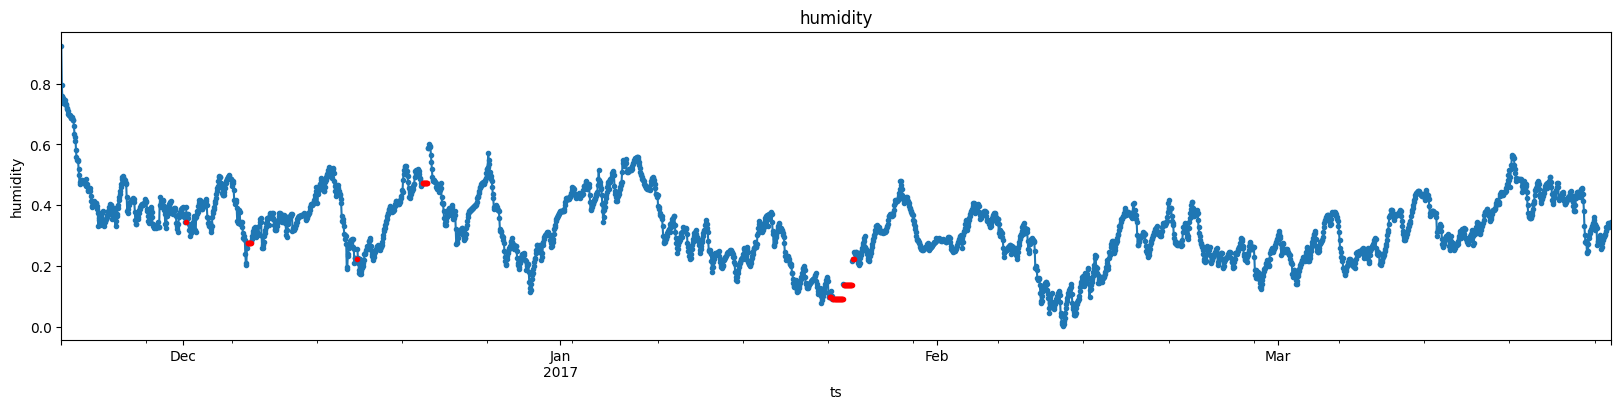

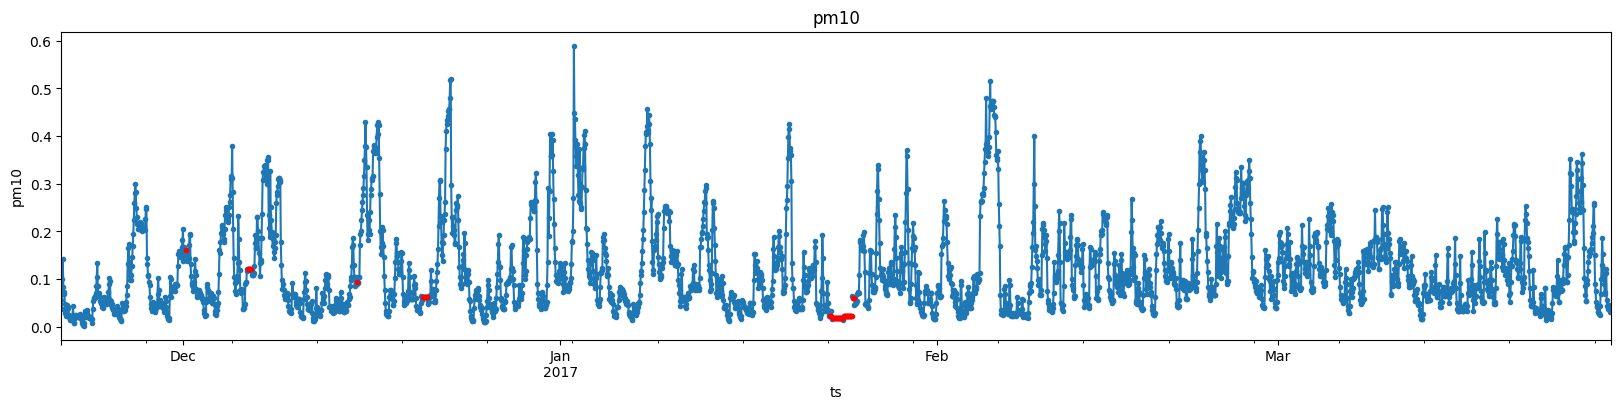

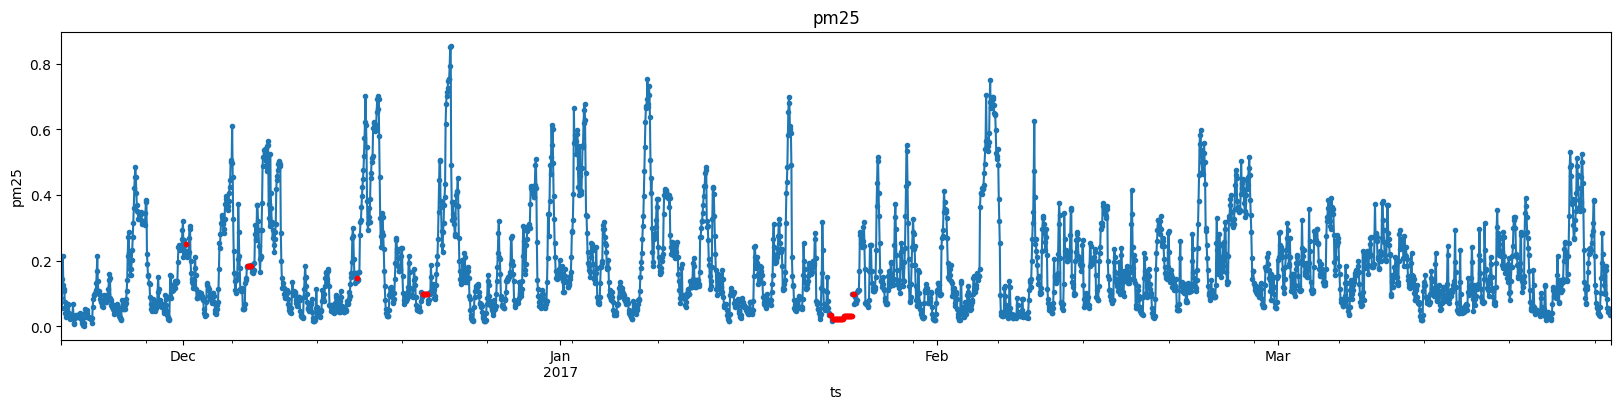

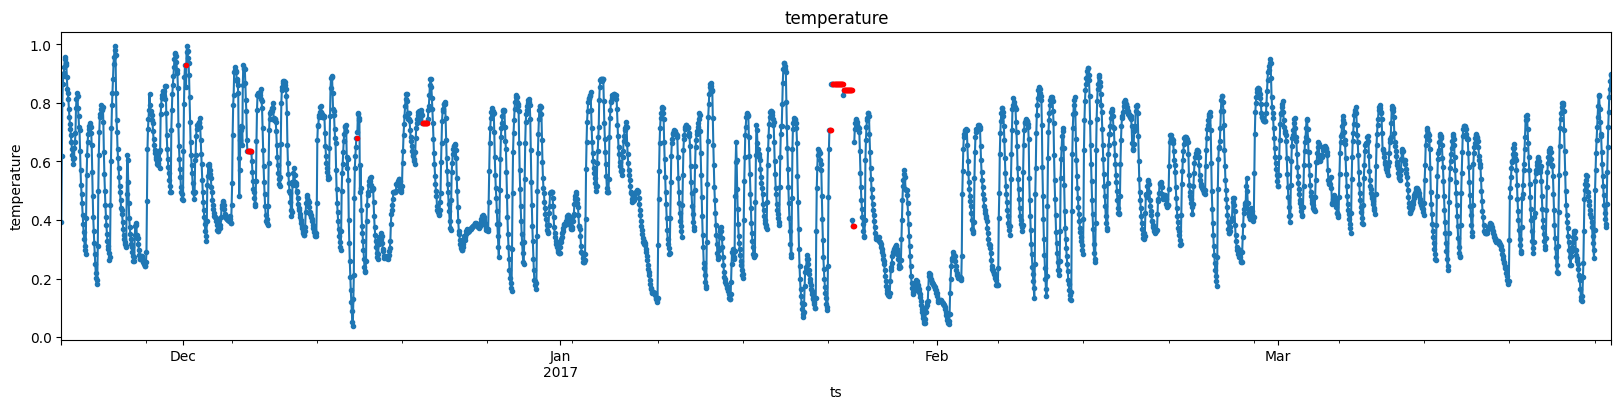

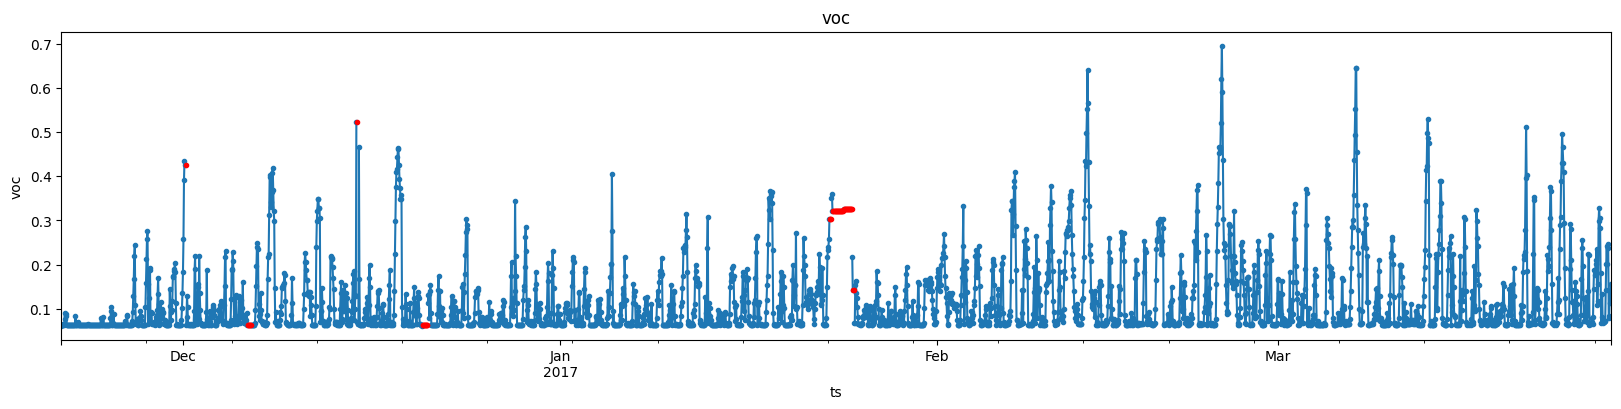

In [7]:
# Introduce the missing timestamps.
# Note that we capture this in a different dataframe.
data_ = data.asfreq("1H")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in data.columns:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

In [8]:
data_imputed.isnull().sum()

,0
co2,0
humidity,0
pm10,0
pm25,0
temperature,0
voc,0


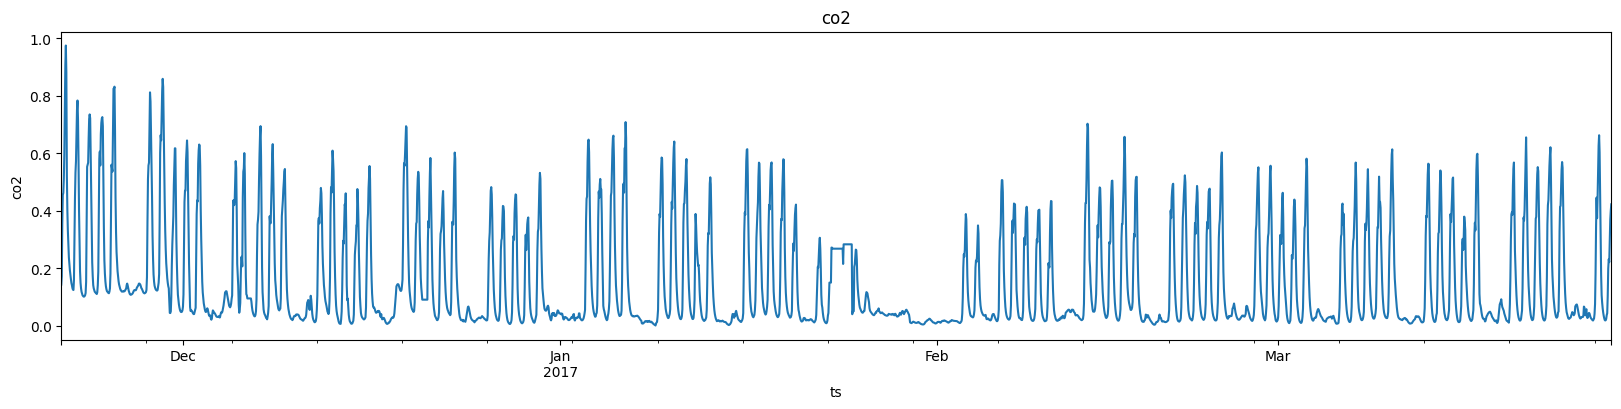

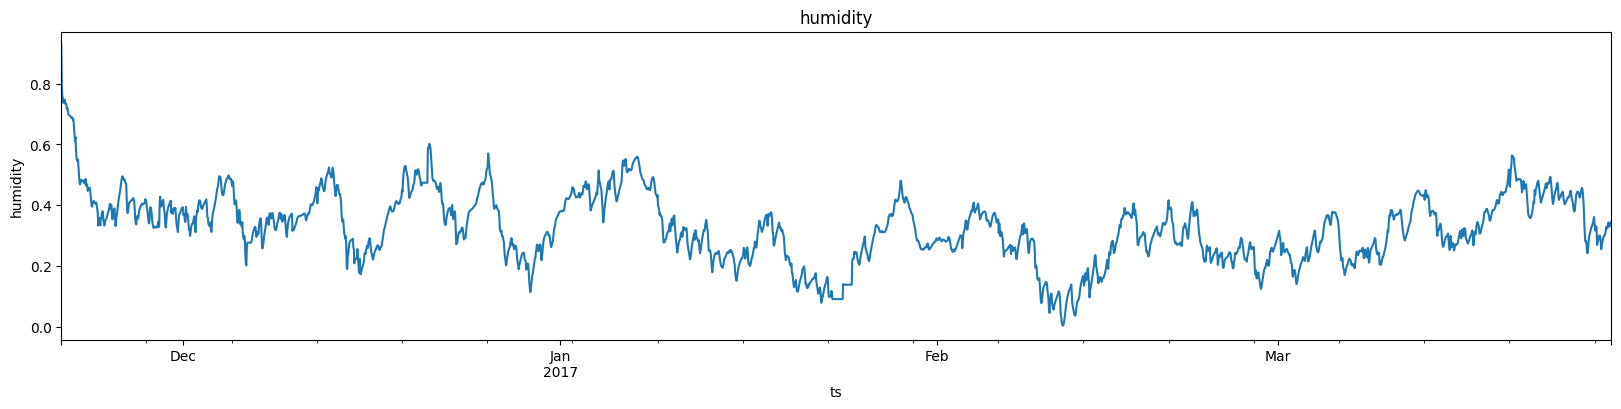

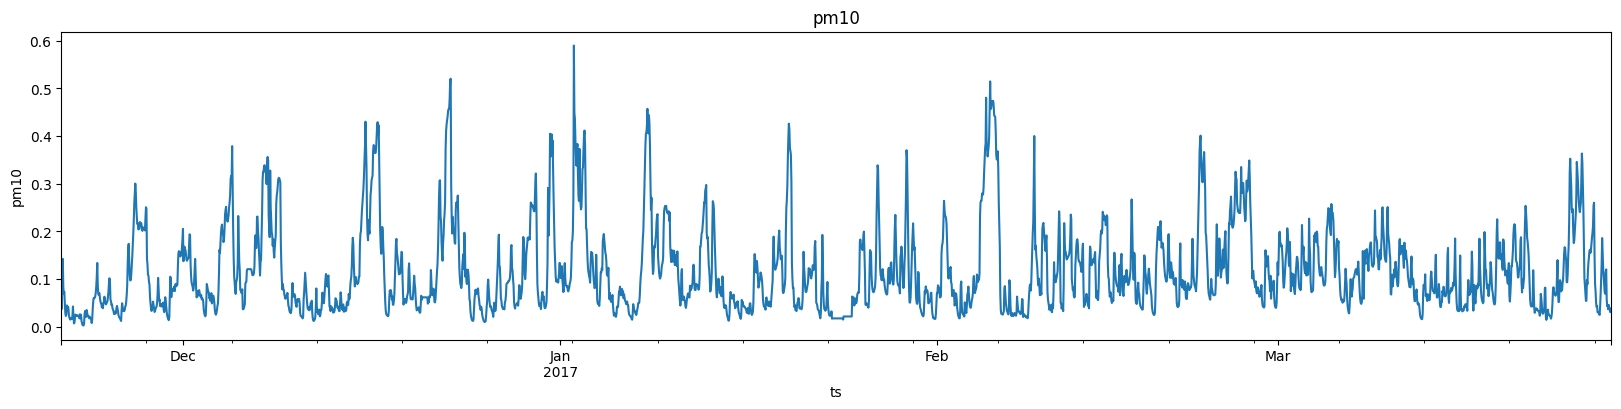

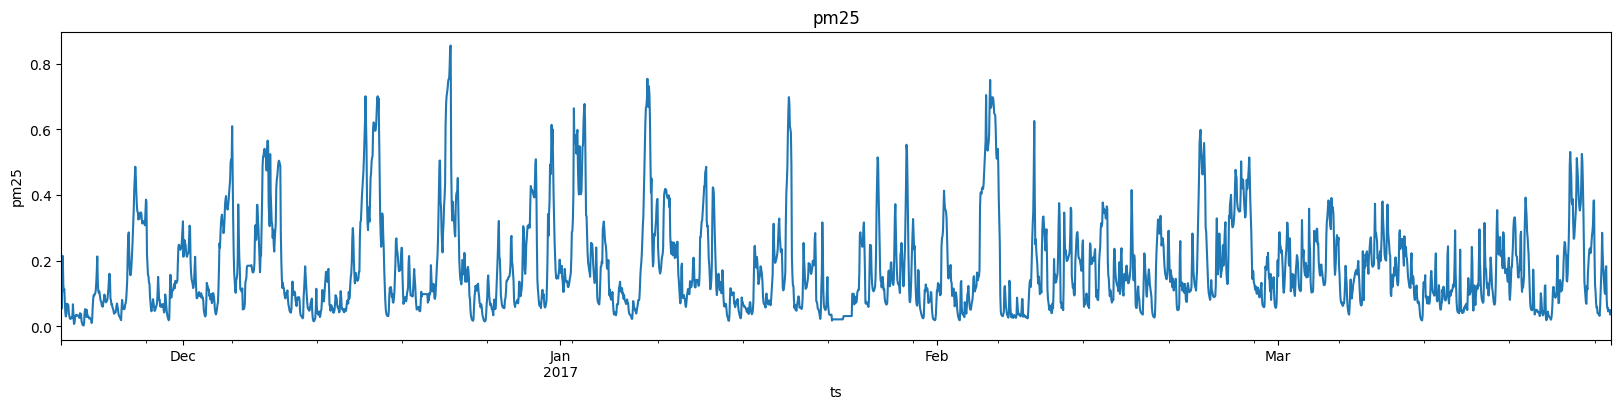

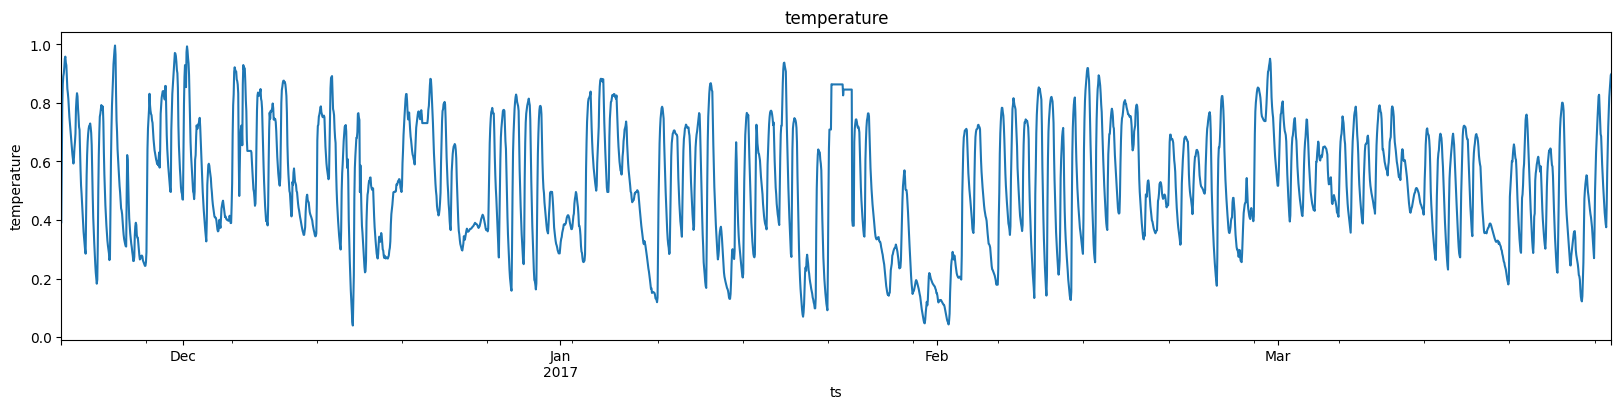

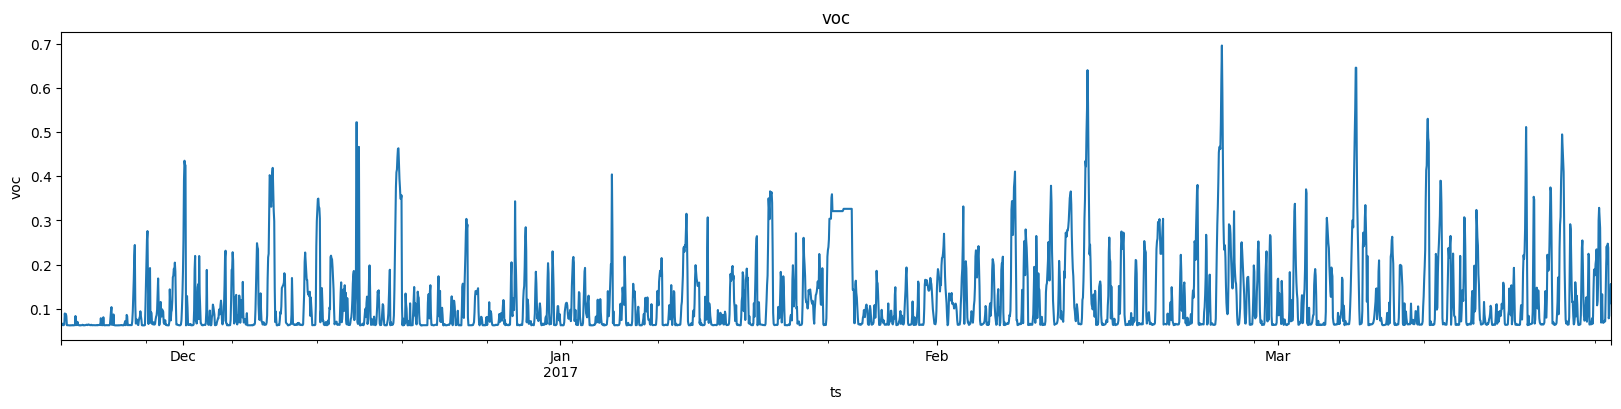

In [9]:
# Plot the time series after data imputation.
pollutants=data.columns
for var in pollutants:

    # Plot the time series
    data_imputed[var].plot(figsize=(20, 4))

    # Add title
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

**Seasonality**

Indoor Air pollutant concentration changes with car traffic. Lets check how they vary during the hours in a day.


In [10]:
# Capture "time" in a new variable.
data=data_imputed
time_ = data.index.time

time_ = pd.Series(time_, index=data.index)

time_.head()

,0
ts,
2016-11-21 00:00:00,00:00:00
2016-11-21 01:00:00,01:00:00
2016-11-21 02:00:00,02:00:00
2016-11-21 03:00:00,03:00:00
2016-11-21 04:00:00,04:00:00


In [11]:
pollutants

Index(['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc'], dtype='object')

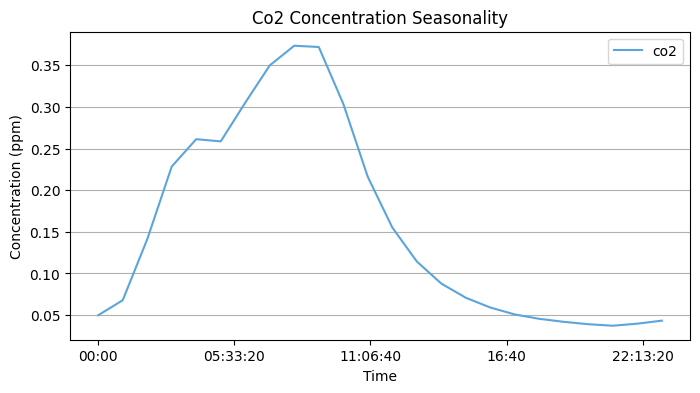

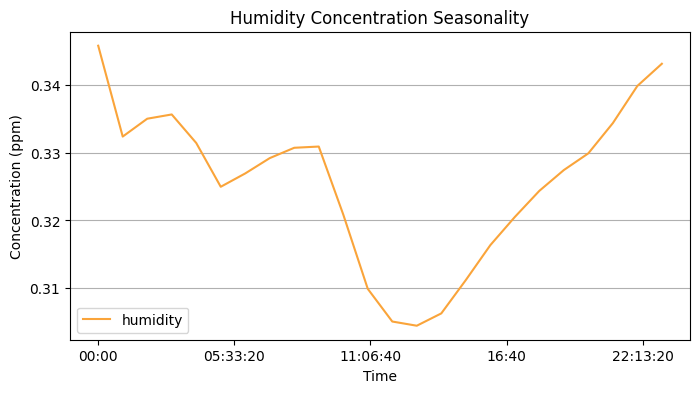

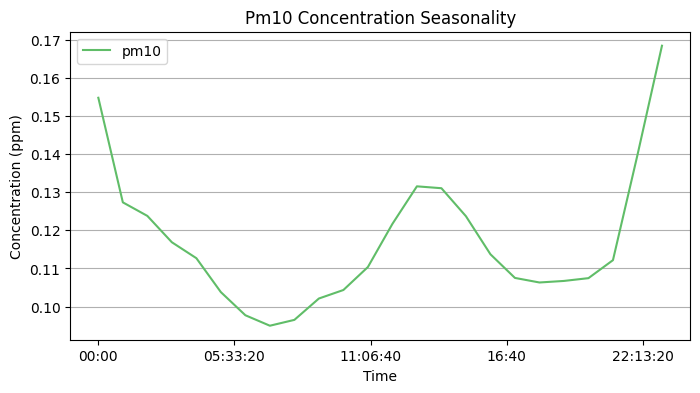

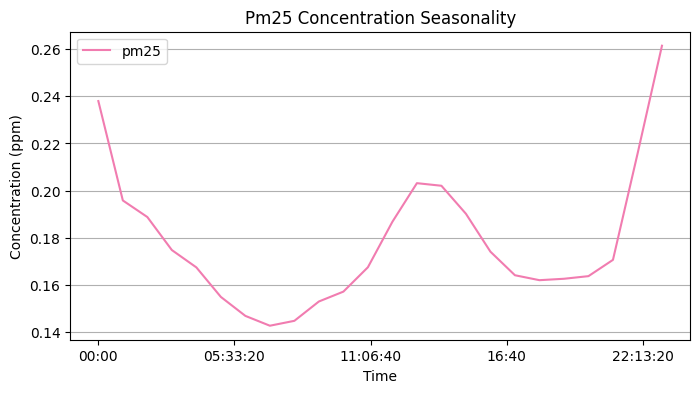

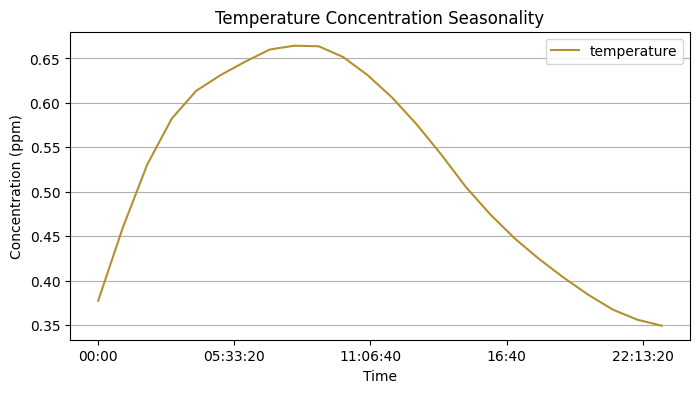

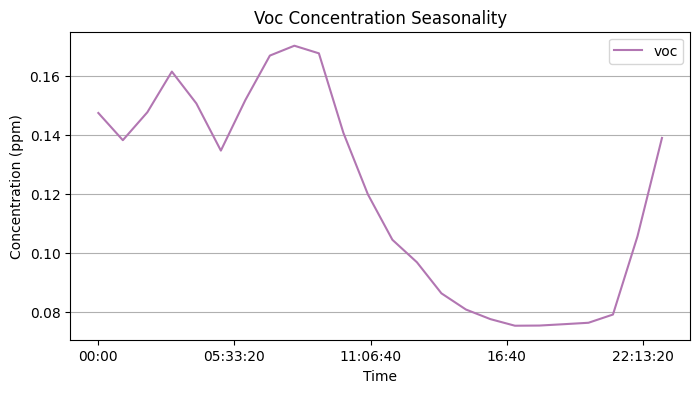

In [18]:
import os
import matplotlib.pyplot as plt

# Ensure the "Plots" directory exists
os.makedirs("./Plots", exist_ok=True)

# Use a custom color scheme with muted colors
colors = {
    'co2': '#5BA5DA',
    'humidity': '#FAA43A',
    'pm10': '#60BD68',
    'pm25': '#F17CB0',
    'temperature': '#B2912F',
    'voc': '#B276B2'
}

for variable in pollutants:
    # Apply the groupby operation and plot the mean concentration for each variable for daily frequency
    fig, ax = plt.subplots(figsize=(8, 4))
    data.groupby(time_)[[variable]].mean().plot(ax=ax, color=colors[variable])
    ax.set_title(f"{variable.capitalize()} Concentration Seasonality")
    ax.set_ylabel("Concentration (ppm)")
    ax.set_xlabel("Time")
    ax.grid(axis='y')  # Add grid lines to the y-axis

    # Save the figure as a high-quality PDF file
    fig.savefig(f"./Plots/{variable}_seasonality.pdf", dpi=300, bbox_inches='tight')

    plt.show()  # Show the plot

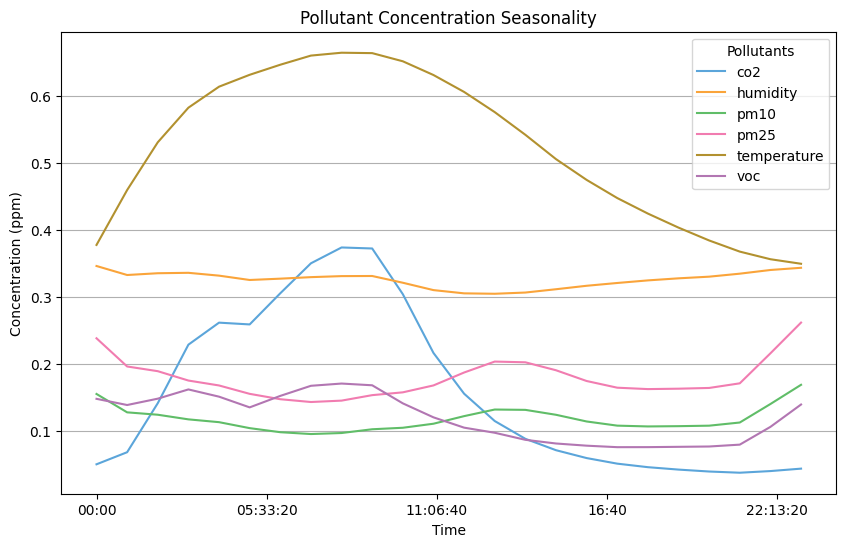

In [19]:
import matplotlib.pyplot as plt

# Use a custom color scheme with muted colors
colors = {
    'co2': '#5BA5DA',
    'humidity': '#FAA43A',
    'pm10': '#60BD68',
    'pm25': '#F17CB0',
    'temperature': '#B2912F',
    'voc': '#B276B2'
}

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each pollutant and plot it on the same axis
for variable in pollutants:
    # Plot the mean concentration for each pollutant
    data.groupby(time_)[[variable]].mean().plot(ax=ax, color=colors[variable], label=variable.capitalize())

# Customize the plot
ax.set_title("Pollutant Concentration Seasonality")
ax.set_ylabel("Concentration (ppm)")
ax.set_xlabel("Time")
ax.grid(axis='y')  # Add grid lines to the y-axis
ax.legend(title="Pollutants")  # Add a legend

# Save the combined figure as a high-quality PDF file
fig.savefig("./Plots/all_pollutants_seasonality.pdf", dpi=300, bbox_inches='tight')

# Show the combined plot
plt.show()


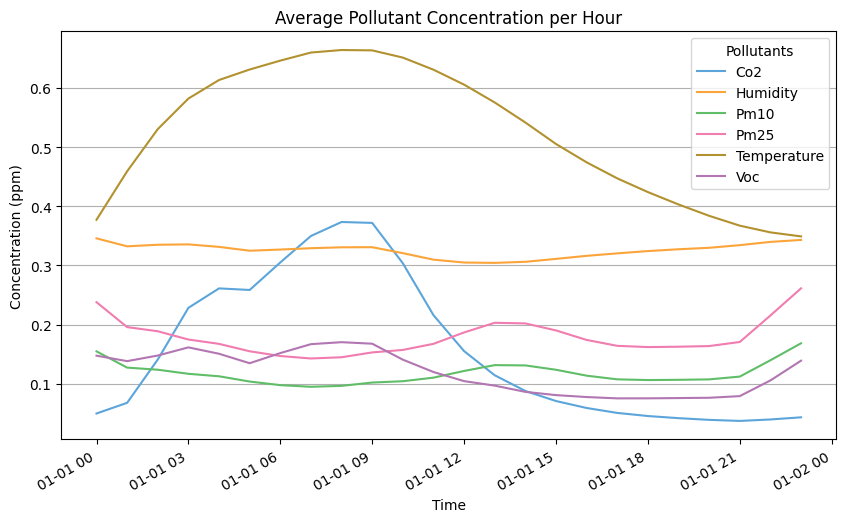

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 6))

for variable in pollutants:
    # Group by the time period and calculate the mean concentration for each variable
    mean_values = data.groupby(time_)[variable].mean()

    # Convert `datetime.time` index to a string format if necessary (e.g., "08:00 AM")
    if isinstance(mean_values.index[0], pd.Timestamp):  # Check if the index is in datetime format
        plot_index = mean_values.index
    else:
        plot_index = pd.to_datetime(mean_values.index, format="%H:%M:%S")

    # Plot each pollutant's mean concentration on the same axis
    ax.plot(plot_index, mean_values, label=variable.capitalize(), color=colors[variable])

# Set labels, title, and grid
ax.set_title("Average Pollutant Concentration per Hour")
ax.set_ylabel("Concentration (ppm)")
ax.set_xlabel("Time")
ax.grid(axis='y')

# Format x-axis for readability if time data is crowded
plt.gcf().autofmt_xdate()

# Add a legend to distinguish pollutants
ax.legend(title="Pollutants")

# Save the figure as a high-quality PDF file
fig.savefig("./Plots/all_pollutants_seasonality.pdf", dpi=300, bbox_inches='tight')

plt.show()


**Autocorrelation Lag Plots**

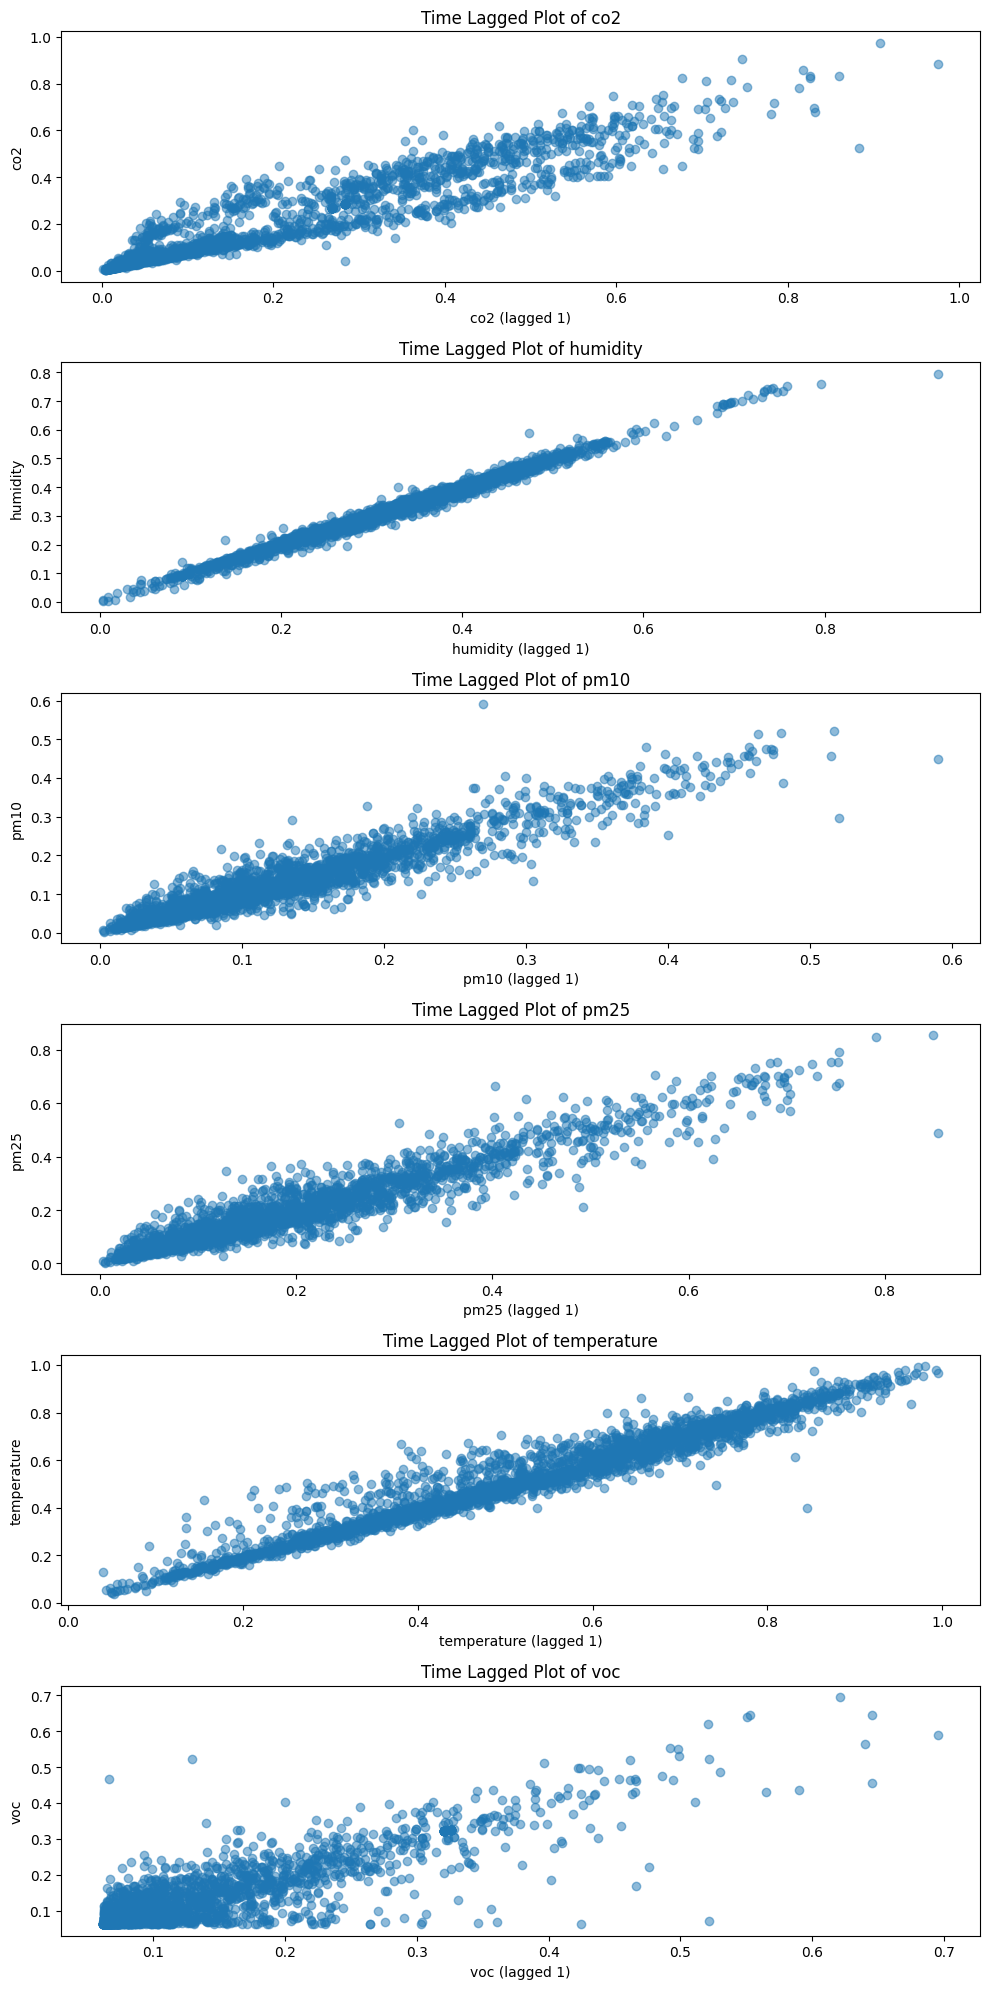

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def create_lag_plot(data):
    fig, axs = plt.subplots(nrows=len(data.columns), figsize=(10, 20))
    for i, col in enumerate(data.columns):
        axs[i].scatter(data.shift(1)[col], data[col], alpha=0.5)
        axs[i].set_xlabel(f"{col} (lagged 1)")
        axs[i].set_ylabel(col)
        axs[i].set_title(f"Time Lagged Plot of {col}")
    plt.tight_layout()
    plt.show()
create_lag_plot(data)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def create_lag_plots(data, lags=6):
    fig, axs = plt.subplots(nrows=len(data.columns), ncols=lags, figsize=(20, 30))
    for i, col in enumerate(data.columns):
        for j in range(1, lags+1):
            axs[i][j-1].scatter(data.shift(j)[col], data[col], alpha=0.5)
            axs[i][j-1].set_xlabel(f"{col} (lagged {j})")
            axs[i][j-1].set_ylabel(col)
            axs[i][j-1].set_title(f"Time Lagged Plot of {col} (Lag {j})")
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

In [24]:
create_lag_plots(data)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_lag_plots_adv(data, lags=5):
    sns.set_style("whitegrid")
    plt.figure(figsize=(24, 30))
    for i, col in enumerate(data.columns):
        for j in range(1, lags+1):
            plt.subplot(len(data.columns), lags, i*lags+j)
            fig = sns.regplot(x=data.shift(j)[col], y=data[col], scatter_kws={"s": 10}, line_kws={"color": "red"},)
            plt.xlabel(f"{col} (lagged {j})", fontsize=20, fontweight="bold")
            plt.ylabel(col, fontsize=20, fontweight="bold")
            plt.title(f"Lag Plot of {col} (Lag {j})", fontsize=22, fontweight="bold")
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            plt.tight_layout()
    plt.show()

create_lag_plots_adv(data)

Output hidden; open in https://colab.research.google.com to view.

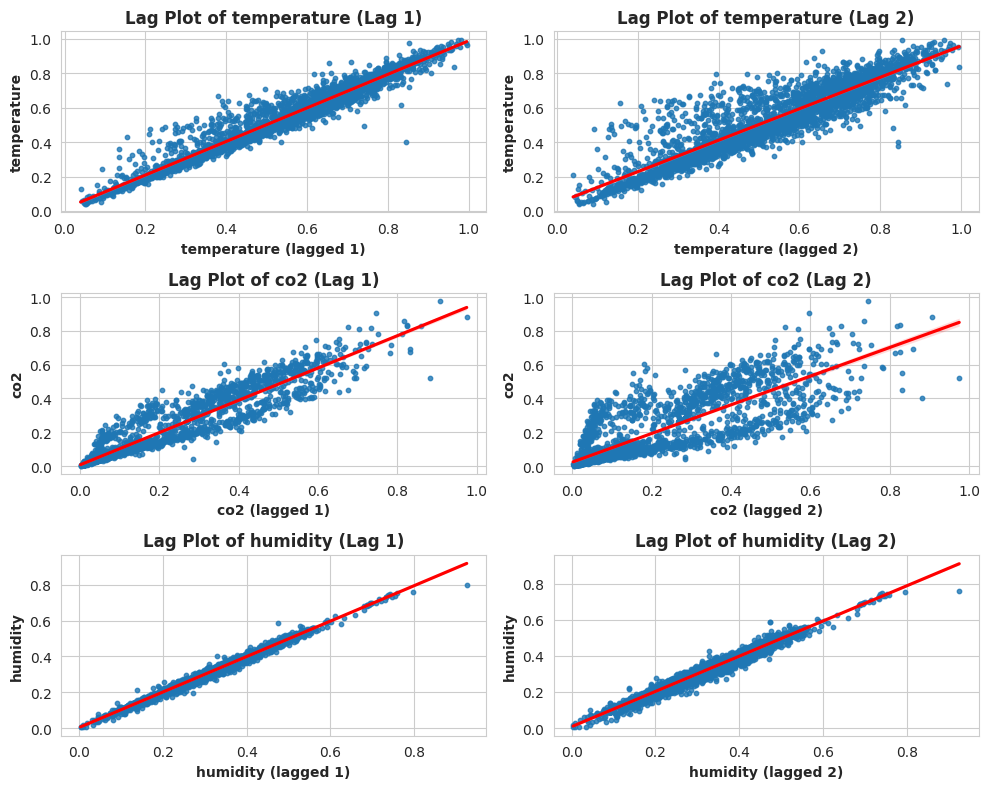

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only temperature, co2, and humidity
data_filtered = data[['temperature', 'co2', 'humidity']]

def create_lag_plots_adv(data, lags=5):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 8))
    for i, col in enumerate(data.columns):
        for j in range(1, lags + 1):
            plt.subplot(len(data.columns), lags, i * lags + j)
            fig = sns.regplot(
                x=data.shift(j)[col],
                y=data[col],
                scatter_kws={"s": 10},
                line_kws={"color": "red"}
            )
            plt.xlabel(f"{col} (lagged {j})", fontsize=10, fontweight="bold")
            plt.ylabel(col, fontsize=10, fontweight="bold")
            plt.title(f"Lag Plot of {col} (Lag {j})", fontsize=12, fontweight="bold")
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
    plt.show()

# Call the function with the filtered data and lags=2
create_lag_plots_adv(data_filtered, lags=2)

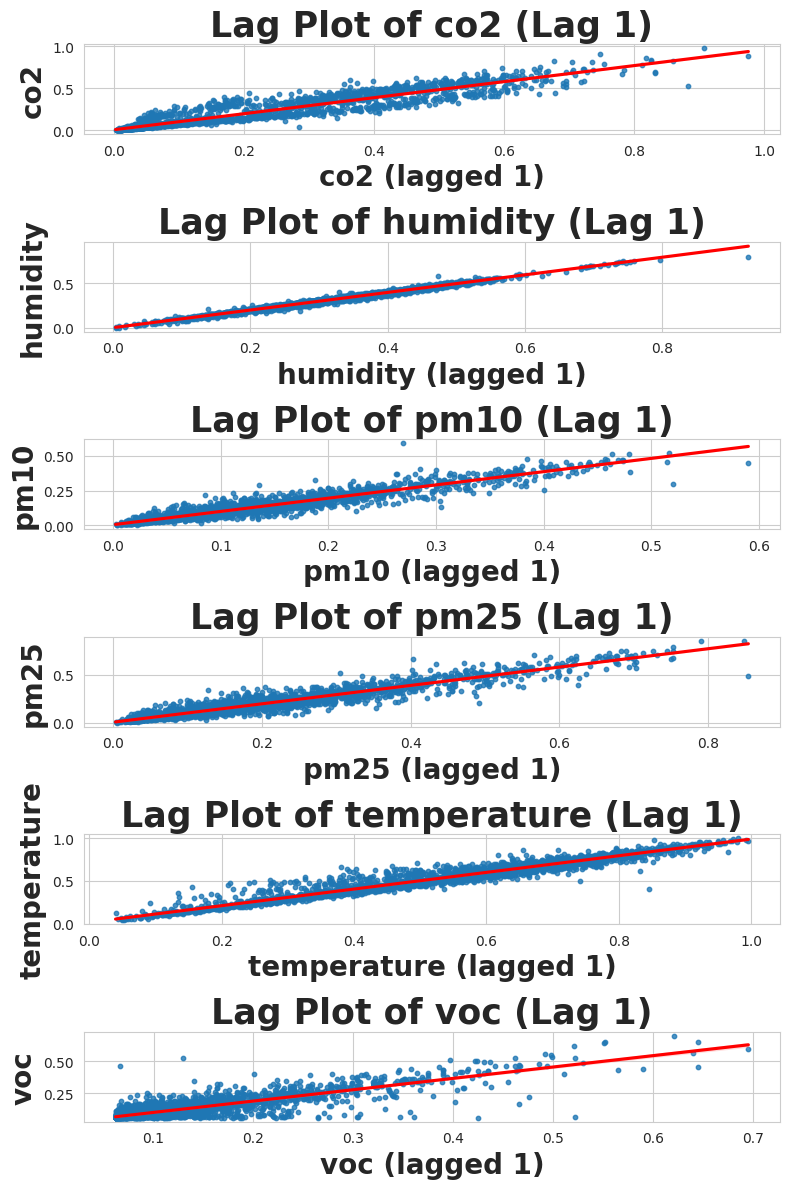

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_lag_plots_adv(data, lags=3):
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,12),dpi=100)
    for i, col in enumerate(data.columns):
        for j in range(1, lags+1):
            plt.subplot(len(data.columns), lags, i*lags+j)
            fig = sns.regplot(x=data.shift(j)[col], y=data[col], scatter_kws={"s": 10}, line_kws={"color": "red"})
            plt.xlabel(f"{col} (lagged {j})", fontsize=20, fontweight="bold")
            plt.ylabel(col, fontsize=20, fontweight="bold")
            plt.title(f"Lag Plot of {col} (Lag {j})", fontsize=25, fontweight="bold")
            plt.tight_layout()
    plt.show()
create_lag_plots_adv(data,lags=1)

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd

def create_partial_autocorrelation_plots(df, plot_title):
    # Handle style settings with a fallback
    try:
        plt.style.use('seaborn-paper')               # Attempt to use seaborn-paper style
    except OSError:
        print("seaborn-paper style not found. Using default style instead.")
        plt.style.use('default')

    # Configure plot settings
    plt.rcParams['figure.dpi'] = 100             # High DPI for publication-quality figures
    plt.rcParams['font.family'] = 'serif'

    # Create partial autocorrelation plots for each feature
    for col in df.columns:
        fig, ax = plt.subplots(figsize=(10, 4))
        plot_pacf(df[col], lags=30, ax=ax, color='tab:blue')

        # Add correlation value to the plot title
        corr_value = df[col].autocorr()
        ax.set_title(f"{col} - Partial Autocorrelation Plot (Corr: {corr_value:.2f})", fontsize=12)

        # Save the plot to a high DPI PNG file (optional: customize path)
        fig.tight_layout()

        # Show the plot on the screen
        plt.show()

seaborn-paper style not found. Using default style instead.


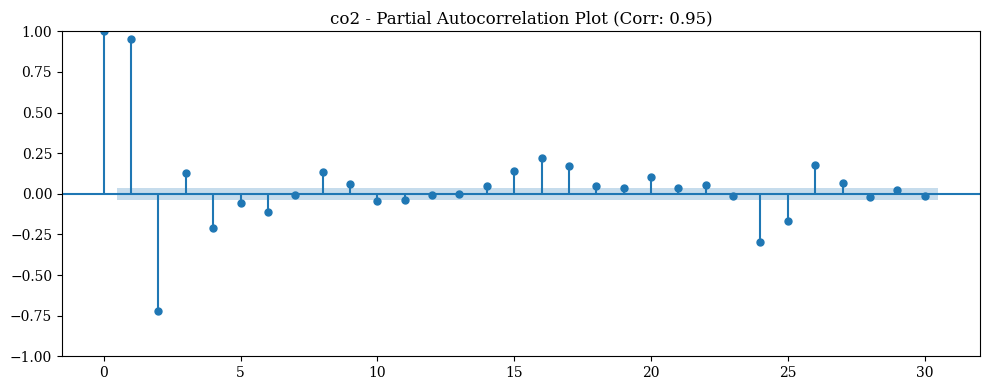

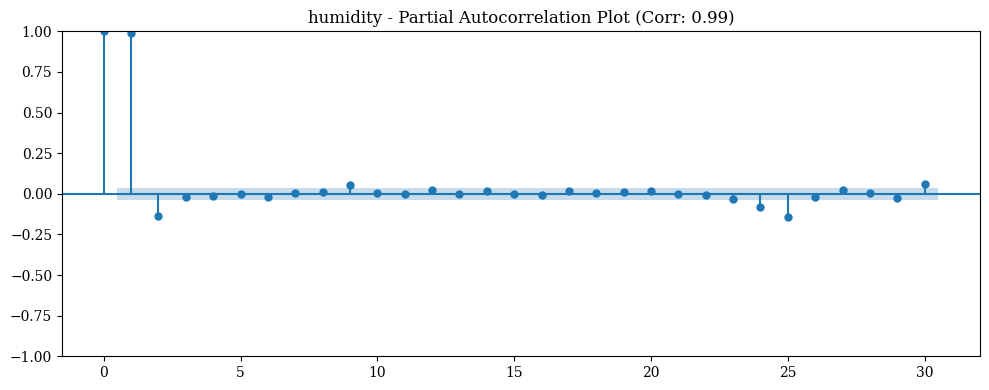

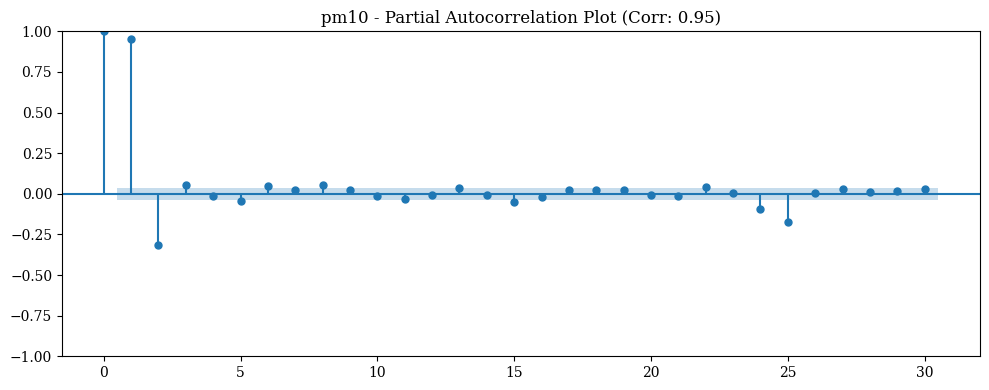

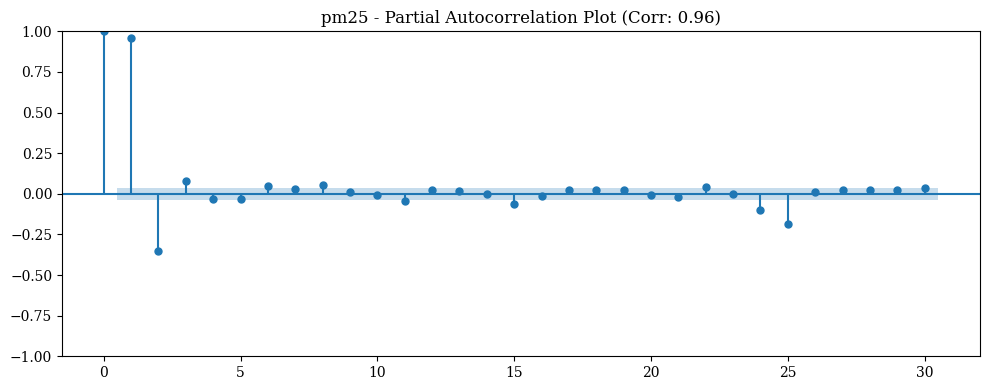

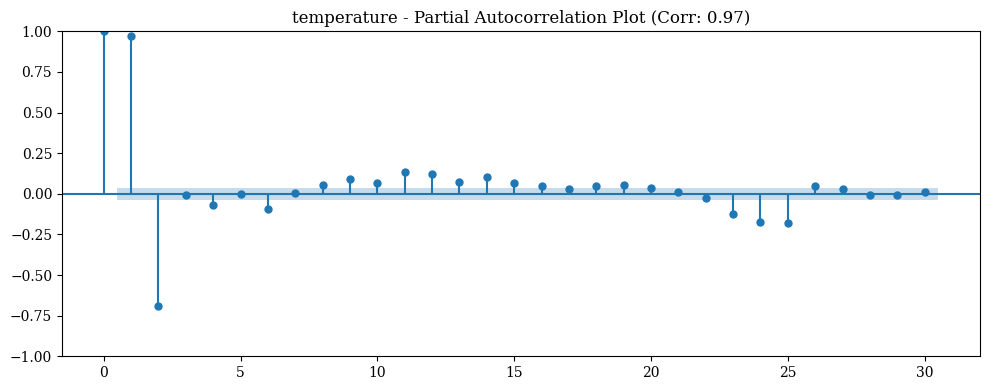

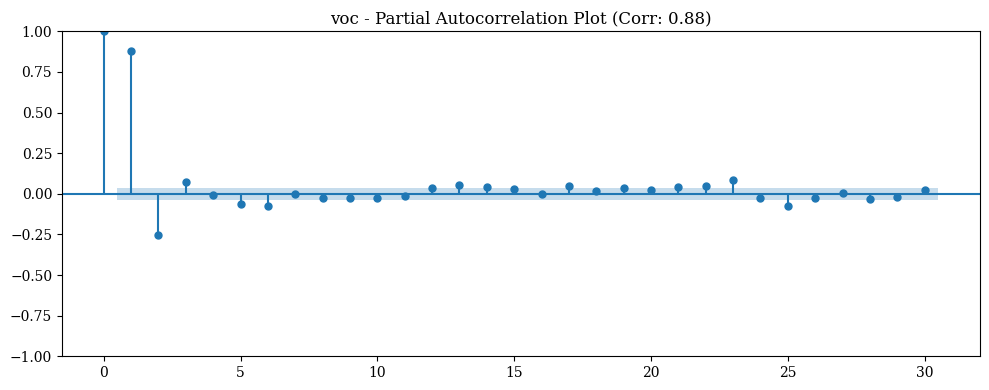

In [29]:
create_partial_autocorrelation_plots(data, 'Autocorrelation Plots',)

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd

def create_partial_autocorrelation_plots(df, plot_title):
    # Handle style settings with a fallback
    try:
        plt.style.use('seaborn-paper')               # Attempt to use seaborn-paper style
    except OSError:
        print("seaborn-paper style not found. Using default style instead.")
        plt.style.use('default')

    # Configure plot settings
    plt.rcParams['figure.dpi'] = 100             # High DPI for publication-quality figures
    plt.rcParams['font.family'] = 'serif'

    # Select the specific columns for plotting
    features = ['temperature', 'co2', 'humidity']

    # Create a single figure with subplots for each feature
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex=True)
    fig.suptitle(plot_title, fontsize=14)

    # Loop through each selected feature and plot its partial autocorrelation in a separate subplot
    for i, col in enumerate(features):
        ax = axes[i]
        plot_pacf(df[col], lags=30, ax=ax, color='tab:blue')

        # Add correlation value to the subplot title
        corr_value = df[col].autocorr()
        ax.set_title(f"{col.capitalize()} - Partial Autocorrelation (Corr: {corr_value:.2f})", fontsize=12)

    # Adjust layout and show the combined figure
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
    plt.show()

seaborn-paper style not found. Using default style instead.


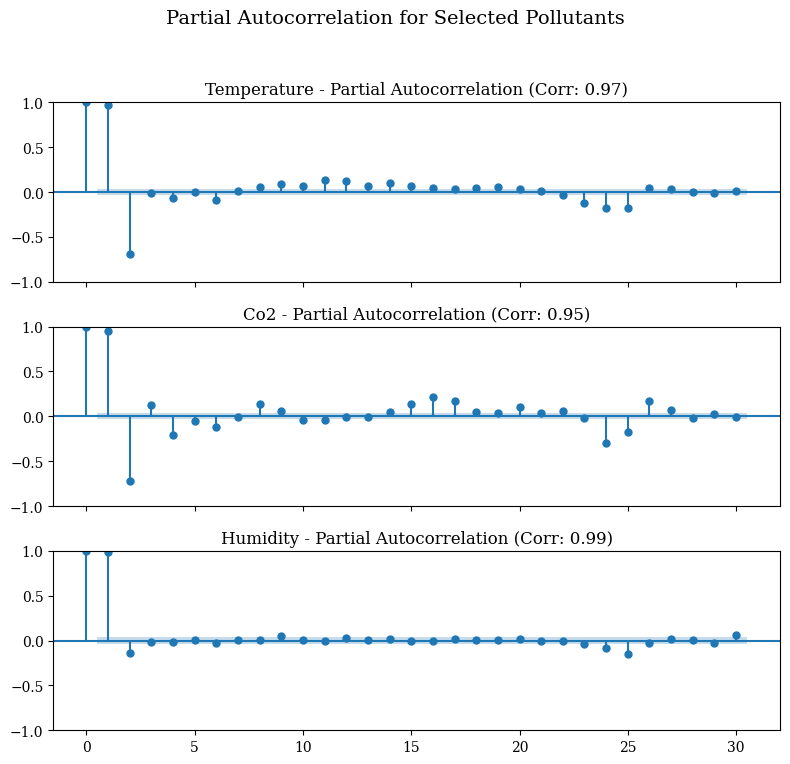

In [31]:
# Filter the columns for temperature, co2, and humidity
selected_data = data[['temperature', 'co2', 'humidity']]

# Call the function with the filtered DataFrame
create_partial_autocorrelation_plots(selected_data, plot_title="Partial Autocorrelation for Selected Pollutants")
